# **Problem 3, Parts G-I: Stochastic Gradient Descent with a Larger Dataset**

Use this notebook to write your code for problem 3 parts G-I by filling in the sections marked `# TODO` and running all cells.


In [ ]:
# Setup.

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Problem 3G: Perform SGD with the new dataset

For the functions below, you may re-use your code from parts 3D-F. Note that you can now modify your SGD function to return the final weight vector instead of the weights after every epoch.



In [ ]:
def loss(X, Y, w):
    '''
    Calculate the squared loss function.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w: A (D, ) shaped numpy array containing the weight vector.
    
    Outputs:
        The loss evaluated with respect to X, Y, and w.
    '''
    
    return np.sum((Y - np.dot(X, w)) ** 2)

def gradient(x, y, w):
    '''
    Calculate the gradient of the loss function with respect to
    a single point (x, y), and using weight vector w.
    
    Inputs:
        x: A (D, ) shaped numpy array containing a single data point.
        y: The float label for the data point.
        w: A (D, ) shaped numpy array containing the weight vector.
        
    Output:
        The gradient of the loss with respect to x, y, and w. 
    '''
    return - 2 * (y - np.dot(x, w)) * x

def SGD(X, Y, w_start, eta, N_epochs):
    '''
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, and N_epochs epochs.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
        eta: The step size.
        N_epochs: The number of epochs (iterations) to run SGD.
        
    Outputs:
        w: A (D, ) shaped array containing the final weight vector.
        losses: A (N_epochs, ) shaped array containing the losses from all iterations.
    '''
    w = w_start
    losses = np.zeros(shape=(N_epochs, ))
    for epoch in range(N_epochs):
      losses[epoch] = loss(X, Y, w)
      for idx in np.random.permutation(len(X)):
        w -= eta * gradient(X[idx], Y[idx], w)
    return w, losses
    

Next, we need to load the dataset. In doing so, the following function may be helpful:



In [ ]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    
    Inputs:
        filename: GeneratorExitiven as a string.
    
    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=1, delimiter=',')

Now, load the dataset in ``sgd_data.csv`` and run SGD using the given parameters; print out the final weights.

In [ ]:

# The following should help you get started:
data = load_data('https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/set1/src/data/sgd_data.csv')

eta = np.exp(-15)
w_start = [0.001, 0.001, 0.001, 0.001, 0.001]
N_epoch = 1000
X = np.concatenate((np.full((len(data), 1), 1), data[ : , :-1]), axis=1)
Y = data[ : , -1]
w = SGD(X, Y, w_start, eta, N_epoch)[0]

print(w)

[ -0.22789033  -5.97852063   3.98841013 -11.85698791   8.91131758]


# Problem 3H: Convergence of SGD

This problem examines the convergence of SGD for different learning rates. Please implement your code in the cell below:

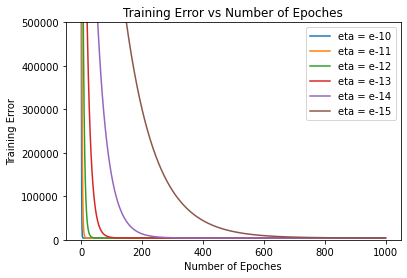

In [ ]:
N_eta = [np.exp(-i) for i in range(10, 16)]
plt.figure()

for eta in N_eta:
  Ein = SGD(X, Y, w_start, eta, N_epoch)[1]
  plt.plot(range(N_epoch), Ein)

plt.legend(["eta = e-{}".format(i) for i in range(10, 16)])
plt.ylabel("Training Error")
plt.xlabel("Number of Epoches")
plt.ylim(0, 500000)
plt.title("Training Error vs Number of Epoches")
plt.show()



# Problem 3I

Provide your code for computing the least-squares analytical solution below.



In [ ]:
w = np.dot(np.linalg.pinv(np.dot(X.T, X)), np.dot(X.T, Y))
print(w)

[ -0.31644251  -5.99157048   4.01509955 -11.93325972   8.99061096]
